# NCAA Tournament 2K19 - EDA Zion's Kingdom

## Intro

Good Luck to everyone especially the ones who wants to bet against Zion and his Blue devils.

Let's start this competition exploring some advanced stats

![ZionUrl](https://media.giphy.com/media/54ZSkrYYe8lk9td6r1/giphy.gif "zion")

In this kernel I would like to explore the NCAA data with a quick look at some classical and advanced stats in order to understand which statistics may be more useful for predicting the Ws & Ls in the tournament.

ICYMI: https://stats.nba.com/help/glossary/

Having a detailed information set about every single games of the different seasons, the first step is to create a dataset which contains aggregated stats for each single team.

In [1]:
## > LIBRARIES
import os
import re
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## > DATA
path_datasets = 'C:/Users/cg08900/Documents/Pandora/Personale/kaggle/NCAA_2k19/datasets/'
path_elab = 'C:/Users/cg08900/Documents/Pandora/Personale/kaggle/NCAA_2k19/elaborazioni/'

df_rs_c_res = pd.read_csv(path_datasets + 'RegularSeasonCompactResults.csv')
df_rs_d_res = pd.read_csv(path_datasets + 'RegularSeasonDetailedResults.csv')
df_teams = pd.read_csv(path_datasets + 'Teams.csv')
df_seeds = pd.read_csv(path_datasets + 'NCAATourneySeeds.csv')
coaches = pd.read_csv(path_datasets + 'TeamCoaches.csv')
df_tourn = pd.read_csv(path_datasets + 'NCAATourneyCompactResults.csv')
mysub = pd.read_csv(path_datasets + 'SampleSubmissionStage1.csv')
massey = pd.read_csv(path_datasets + 'MasseyOrdinals/MasseyOrdinals.csv')

In [2]:
print(massey.head(10))

massey['SystemName'].unique()

   Season  RankingDayNum SystemName  TeamID  OrdinalRank
0    2003             35        SEL    1102          159
1    2003             35        SEL    1103          229
2    2003             35        SEL    1104           12
3    2003             35        SEL    1105          314
4    2003             35        SEL    1106          260
5    2003             35        SEL    1107          249
6    2003             35        SEL    1108          228
7    2003             35        SEL    1110          204
8    2003             35        SEL    1111          183
9    2003             35        SEL    1112           26


array(['SEL', 'AP', 'BIH', 'DUN', 'ENT', 'GRN', 'IMS', 'MAS', 'MKV',
       'MOR', 'POM', 'RPI', 'SAG', 'SAU', 'SE', 'STR', 'USA', 'WLK',
       'WOB', 'BOB', 'DWH', 'ERD', 'ECK', 'BRZ', 'ARG', 'RTH', 'WOL',
       'HOL', 'COL', 'DOL', 'GC', 'GRS', 'HER', 'TSR', 'MIC', 'WTE', 'BD',
       'MGY', 'RAG', 'CNG', 'SIM', 'DES', 'JON', 'LYN', 'NOR', 'RM',
       'REI', 'ACU', 'BCM', 'CMV', 'SAP', 'DC', 'KLK', 'WIL', 'ROH',
       'RIS', 'REN', 'SCR', 'DOK', 'PIG', 'KPK', 'PKL', 'TRX', 'MB',
       'JCI', 'PH', 'LYD', 'KRA', 'RTR', 'UCS', 'ISR', 'CPR', 'BKM',
       'JEN', 'REW', 'STH', 'SPW', 'RSE', 'PGH', 'CPA', 'RTB', 'TOL',
       'HKB', 'BPI', 'TW', 'NOL', 'DC2', 'DCI', 'OMY', 'EBB', 'LMC', 'RT',
       'KEL', 'KMV', 'RTP', 'TMR', 'AUS', 'ROG', 'BP5', 'PTS', 'KOS',
       'PEQ', 'ADE', 'BNM', 'CJB', 'BUR', 'HAT', 'MSX', 'BBT', '7OT',
       'SFX', 'EBP', 'TBD', 'CRO', 'D1A', 'TPR', 'BLS', 'DII', 'KBM',
       'TRP', 'LOG', 'SP', 'STF', 'WMR', 'PPR', 'MPI', 'STS', 'UPS',
       'SPR', 'Mv

In [3]:
df_rs_d_res.head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
5,2003,11,1458,81,1186,55,H,0,26,57,...,11,12,17,6,22,8,19,4,3,25
6,2003,12,1161,80,1236,62,H,0,23,55,...,15,20,28,9,21,11,30,10,4,28
7,2003,12,1186,75,1457,61,N,0,28,62,...,17,17,23,8,25,10,15,14,8,18
8,2003,12,1194,71,1156,66,N,0,28,58,...,18,12,27,13,26,13,25,8,2,18
9,2003,12,1458,84,1296,56,H,0,32,67,...,14,7,12,9,23,10,18,1,3,18


In [3]:
## > DATA CLEANING
# clean seed information

df_seeds_cl = df_seeds.loc[:, ['TeamID', 'Season', 'Seed']]

def clean_seed(seed):
    s_int = int(seed[1:3])
    return s_int

def extract_seed_region(seed):
    s_reg = seed[0:1]
    return s_reg

df_seeds_cl['seed_int'] = df_seeds_cl['Seed'].apply(lambda x: clean_seed(x))
df_seeds_cl['seed_region'] = df_seeds_cl['Seed'].apply(lambda x: extract_seed_region(x))
df_seeds_cl['top_seeded_teams'] = np.where(df_seeds_cl['Seed'].isnull(), 0, 1)

df_seeds_cl.drop(labels=['Seed'], inplace=True, axis=1) # This is the string label
df_seeds_cl.head()

,TeamID,Season,seed_int,seed_region,top_seeded_teams
0,1207,1985,1,W,1
1,1210,1985,2,W,1
2,1228,1985,3,W,1
3,1260,1985,4,W,1
4,1374,1985,5,W,1


In [4]:
## > DATA CLEANING
# clean team information

df_teams_cl = df_teams.iloc[:,:2]
df_teams_cl.head(2)

,TeamID,TeamName
0,1101,Abilene Chr
1,1102,Air Force


In [5]:

## > DATA CLEANING
# create games dataframe WINNERS

def new_name_w_1(old_name):
    match = re.match(r'^L', old_name)
    if match:
        out = re.sub('^L','', old_name)
        return out + '_opp'
    return old_name

def new_name_w_2(old_name):
    match = re.match(r'^W', old_name)
    if match:
        out = re.sub('^W','', old_name)
        return out
    return old_name

def prepare_stats_extended_winners(df_in, df_seed_in, df_teams_in):
    df_in['poss'] = df_in['WFGA'] + 0.475*df_in['WFTA'] - df_in['WOR'] + df_in['WTO']
    df_in['opp_poss'] = df_in['LFGA'] + 0.475*df_in['LFTA'] - df_in['LOR'] + df_in['LTO']
    df_in['off_rating'] = 100*(df_in['WScore'] / df_in['poss'])
    df_in['def_rating'] = 100*(df_in['LScore'] / df_in['opp_poss'])
    df_in['net_rating'] = df_in['off_rating'] - df_in['def_rating']
    df_in['pace'] = 48*((df_in['poss']+df_in['opp_poss'])/(2*(240/5)))
    
    df_in = df_in.rename(columns={'WTeamID':'TeamID', 
                                  'WLoc':'_Loc',
                                  'LTeamID':'TeamID_opp',
                                  'WScore':'Score_left', 
                                  'LScore':'Score_right'})
    
    df_seeds_opp = df_seed_in.rename(columns={'TeamID':'TeamID_opp',
                                              'seed_int':'seed_int_opp',
                                              'seed_region':'seed_region_opp',
                                              'top_seeded_teams':'top_seeded_teams_opp'})
    
    df_out = pd.merge(left=df_in, right=df_seeds_cl, how='left', on=['Season', 'TeamID'])
    df_out = pd.merge(left=df_out, right=df_seeds_opp, how='left', on=['Season', 'TeamID_opp'])
    df_out = pd.merge(left=df_out, right=df_teams_in, how='left', on=['TeamID'])
    
    df_out['DayNum'] = pd.to_numeric(df_out['DayNum'])
    df_out['win_dummy'] = 1
    
    df_out['seed_int'] = np.where(df_out['seed_int'].isnull(), 20, df_out['seed_int'])
    df_out['seed_region'] = np.where(df_out['seed_region'].isnull(), 'NoTour', df_out['seed_region'])
    df_out['top_seeded_teams'] = np.where(df_out['top_seeded_teams'].isnull(), 0, df_out['top_seeded_teams'])
    
    df_out['seed_int_opp'] = np.where(df_out['seed_int_opp'].isnull(), 20, df_out['seed_int_opp'])
    df_out['seed_region_opp'] = np.where(df_out['seed_region_opp'].isnull(), 'NoTour', df_out['seed_region_opp'])
    df_out['top_seeded_teams_opp'] = np.where(df_out['top_seeded_teams_opp'].isnull(), 0, df_out['top_seeded_teams_opp'])
    
    df_out = df_out.rename(columns=new_name_w_1)
    df_out = df_out.rename(columns=new_name_w_2)
    
    return df_out

df_games_w = prepare_stats_extended_winners(df_rs_d_res, df_seeds_cl, df_teams_cl)

df_games_w.head()

,Season,DayNum,TeamID,Score_left,TeamID_opp,Score_right,_Loc,NumOT,FGM,FGA,...,net_rating,pace,seed_int,seed_region,top_seeded_teams,seed_int_opp,seed_region_opp,top_seeded_teams_opp,TeamName,win_dummy
0,2003,10,1104,68,1328,62,N,0,27,58,...,3.232650,73.5000,10.0,Y,1.0,1.0,W,1.0,Alabama,1
1,2003,10,1272,70,1393,63,N,0,26,62,...,9.441729,68.7625,7.0,Z,1.0,3.0,W,1.0,Memphis,1
2,2003,11,1266,73,1437,61,N,0,24,58,...,18.743237,64.8500,3.0,Y,1.0,20.0,NoTour,0.0,Marquette,1
3,2003,11,1296,56,1457,50,N,0,18,38,...,9.338222,58.4250,20.0,NoTour,0.0,20.0,NoTour,0.0,N Illinois,1
4,2003,11,1400,77,1208,71,N,0,30,61,...,8.742741,64.0000,1.0,X,1.0,20.0,NoTour,0.0,Texas,1


In [6]:
## > DATA CLEANING
# create games dataframe LOSERS

def new_name_l_1(old_name):
    match = re.match(r'^W', old_name)
    if match:
        out = re.sub('^W','', old_name)
        return out + '_opp'
    return old_name

def new_name_l_2(old_name):
    match = re.match(r'^L', old_name)
    if match:
        out = re.sub('^L','', old_name)
        return out
    return old_name

def prepare_stats_extended_losers(df_in, df_seed_in, df_teams_in):
    df_in['poss'] = df_in['LFGA'] + (0.475*df_in['LFTA']) - df_in['LOR'] + df_in['LTO']
    df_in['opp_poss'] = df_in['WFGA'] + (0.475*df_in['WFTA']) - df_in['WOR'] + df_in['WTO']
    df_in['off_rating'] = 100*(df_in['LScore'] / df_in['poss'])
    df_in['def_rating'] = 100*(df_in['WScore'] / df_in['opp_poss'])
    df_in['net_rating'] = df_in['off_rating'] - df_in['def_rating']
    df_in['pace'] = 48*((df_in['poss']+df_in['opp_poss'])/(2*(240/5)))
    
    df_in = df_in.rename(columns={'LTeamID':'TeamID', 
                                  'LLoc':'_Loc',
                                  'WTeamID':'TeamID_opp',
                                  'LScore':'Score_left', 
                                  'WScore':'Score_right'})
    
    df_seeds_opp = df_seed_in.rename(columns={'TeamID':'TeamID_opp',
                                              'seed_int':'seed_int_opp',
                                              'seed_region':'seed_region_opp',
                                              'top_seeded_teams':'top_seeded_teams_opp'})
    
    df_out = pd.merge(left=df_in, right=df_seeds_cl, how='left', on=['Season', 'TeamID'])
    df_out = pd.merge(left=df_out, right=df_seeds_opp, how='left', on=['Season', 'TeamID_opp'])
    df_out = pd.merge(left=df_out, right=df_teams_in, how='left', on=['TeamID'])
    
    df_out['DayNum'] = pd.to_numeric(df_out['DayNum'])
    df_out['win_dummy'] = 0
    
    df_out['seed_int'] = np.where(df_out['seed_int'].isnull(), 20, df_out['seed_int'])
    df_out['seed_region'] = np.where(df_out['seed_region'].isnull(), 'NoTour', df_out['seed_region'])
    df_out['top_seeded_teams'] = np.where(df_out['top_seeded_teams'].isnull(), 0, df_out['top_seeded_teams'])
    
    df_out['seed_int_opp'] = np.where(df_out['seed_int_opp'].isnull(), 20, df_out['seed_int_opp'])
    df_out['seed_region_opp'] = np.where(df_out['seed_region_opp'].isnull(), 'NoTour', df_out['seed_region_opp'])
    df_out['top_seeded_teams_opp'] = np.where(df_out['top_seeded_teams_opp'].isnull(), 0, df_out['top_seeded_teams_opp'])

    df_out = df_out.rename(columns=new_name_l_1)
    df_out = df_out.rename(columns=new_name_l_2)
    
    return df_out

df_games_l = prepare_stats_extended_losers(df_rs_d_res, df_seeds_cl, df_teams_cl)

df_games_l.head()

,Season,DayNum,TeamID_opp,Score_right,TeamID,Score_left,oc_opp,NumOT,FGM_opp,FGA_opp,...,net_rating,pace,seed_int,seed_region,top_seeded_teams,seed_int_opp,seed_region_opp,top_seeded_teams_opp,TeamName,win_dummy
0,2003,10,1104,68,1328,62,N,0,27,58,...,-3.232650,73.5000,1.0,W,1.0,10.0,Y,1.0,Oklahoma,0
1,2003,10,1272,70,1393,63,N,0,26,62,...,-9.441729,68.7625,3.0,W,1.0,7.0,Z,1.0,Syracuse,0
2,2003,11,1266,73,1437,61,N,0,24,58,...,-18.743237,64.8500,20.0,NoTour,0.0,3.0,Y,1.0,Villanova,0
3,2003,11,1296,56,1457,50,N,0,18,38,...,-9.338222,58.4250,20.0,NoTour,0.0,20.0,NoTour,0.0,Winthrop,0
4,2003,11,1400,77,1208,71,N,0,30,61,...,-8.742741,64.0000,20.0,NoTour,0.0,1.0,X,1.0,Georgia,0


In [7]:
## > MERGE

df_games_t = pd.concat([df_games_w,df_games_l], sort=True)

In [8]:
## > AGGREGATED STATS BY TEAM AND SEASON

def aggr_stats(df):
    d = {}
    d['G'] = df['win_dummy'].count()
    d['W'] = df['win_dummy'].sum()
    d['L'] = np.sum(df['win_dummy'] == 0)
    d['G_vs_topseeds'] = np.sum(df['top_seeded_teams_opp'] == 1)
    d['W_vs_topseeds'] = np.sum((df['win_dummy'] == 1) & (df['top_seeded_teams_opp'] == 1))
    d['L_vs_topseeds'] = np.sum((df['win_dummy'] == 0) & (df['top_seeded_teams_opp'] == 1))
    d['G_last30D'] = np.sum((df['DayNum'] > 100))
    d['W_last30D'] = np.sum((df['win_dummy'] == 1) & (df['DayNum'] > 100))
    d['L_last30D'] = np.sum((df['win_dummy'] == 0) & (df['DayNum'] > 100))
    d['G_H'] = np.sum((df['_Loc'] == 'H'))
    d['W_H'] = np.sum((df['win_dummy'] == 1) & (df['_Loc'] == 'H'))
    d['L_H'] = np.sum((df['win_dummy'] == 0) & (df['_Loc'] == 'H'))
    d['G_A'] = np.sum((df['_Loc'] == 'A'))
    d['W_A'] = np.sum((df['win_dummy'] == 1) & (df['_Loc'] == 'A'))
    d['L_A'] = np.sum((df['win_dummy'] == 0) & (df['_Loc'] == 'A'))
    d['G_N'] = np.sum((df['_Loc'] == 'N'))
    d['W_N'] = np.sum((df['win_dummy'] == 1) & (df['_Loc'] == 'N'))
    d['L_N'] = np.sum((df['win_dummy'] == 0) & (df['_Loc'] == 'N'))
    
    d['PS'] = np.mean(df['Score_left'])
    d['PS_H'] = np.mean(df['Score_left'][df['_Loc'] == 'H'])
    d['PS_A'] = np.mean(df['Score_left'][df['_Loc'] == 'A'])
    d['PS_N'] = np.mean(df['Score_left'][df['_Loc'] == 'N'])
    d['PS_last30D'] = np.mean(df['Score_left'][df['DayNum'] > 100])
    
    d['PA'] = np.mean(df['Score_right'])
    d['PA_H'] = np.mean(df['Score_right'][df['_Loc'] == 'H'])
    d['PA_A'] = np.mean(df['Score_right'][df['_Loc'] == 'A'])
    d['PA_N'] = np.mean(df['Score_right'][df['_Loc'] == 'N'])
    d['PA_last30D'] = np.mean(df['Score_right'][df['DayNum'] > 100])
    
    d['poss_m'] = np.mean(df['poss'])
    d['opp_poss_m'] = np.mean(df['opp_poss'])
    d['off_rating_m'] = np.mean(df['off_rating'])
    d['def_rating_m'] = np.mean(df['def_rating'])
    d['net_rating_m'] = np.mean(df['net_rating'])
    d['pace_m'] = np.mean(df['pace'])
    
    d['off_rating_m_last30D'] = np.mean(df['off_rating'][df['DayNum'] > 100])
    d['def_rating_m_last30D'] = np.mean(df['def_rating'][df['DayNum'] > 100])
    d['net_rating_m_last30D'] = np.mean(df['net_rating'][df['DayNum'] > 100])
    
    d['off_rating_m_vs_topseeds'] = np.mean(df['off_rating'][df['top_seeded_teams_opp'] == 1])
    d['def_rating_m_vs_topseeds'] = np.mean(df['def_rating'][df['top_seeded_teams_opp'] == 1])
    d['net_rating_m_vs_topseeds'] = np.mean(df['net_rating'][df['top_seeded_teams_opp'] == 1])
    
    return pd.Series(d)


df_agg_stats = df_games_t.\
                          groupby([df_games_t['Season'], 
                                   df_games_t['TeamID'],
                                   df_games_t['TeamName'],
                                   df_games_t['seed_int'],
                                   df_games_t['seed_region']], 
                                  as_index=False).\
                          apply(aggr_stats).\
                          reset_index()


df_agg_stats['w_pct'] = df_agg_stats['W'] / df_agg_stats['G']
df_agg_stats['w_pct_last30D'] = df_agg_stats['W_last30D'] / df_agg_stats['G_last30D']
df_agg_stats['w_pct_vs_topseeds'] = df_agg_stats['W_vs_topseeds'] / df_agg_stats['G_vs_topseeds']

df_agg_stats.head(20)

,Season,TeamID,TeamName,seed_int,seed_region,G,W,L,G_vs_topseeds,W_vs_topseeds,...,pace_m,off_rating_m_last30D,def_rating_m_last30D,net_rating_m_last30D,off_rating_m_vs_topseeds,def_rating_m_vs_topseeds,net_rating_m_vs_topseeds,w_pct,w_pct_last30D,w_pct_vs_topseeds
0,2003,1102,Air Force,20.0,NoTour,28.0,12.0,16.0,8.0,1.0,...,55.045536,103.480479,113.001910,-9.521431,86.069266,106.075033,-20.005767,0.428571,0.250000,0.125000
1,2003,1103,Akron,20.0,NoTour,27.0,13.0,14.0,2.0,1.0,...,70.900000,112.243185,108.383990,3.859194,108.428135,112.513155,-4.085020,0.481481,0.571429,0.500000
2,2003,1104,Alabama,10.0,Y,28.0,17.0,11.0,11.0,5.0,...,66.720536,108.858455,103.367799,5.490656,95.831973,98.942661,-3.110688,0.607143,0.500000,0.454545
3,2003,1105,Alabama A&M,20.0,NoTour,26.0,7.0,19.0,4.0,1.0,...,76.680288,100.559264,99.375646,1.183618,93.914723,114.009555,-20.094831,0.269231,0.250000,0.250000
4,2003,1106,Alabama St,20.0,NoTour,28.0,13.0,15.0,5.0,1.0,...,67.716071,90.181382,96.510427,-6.329045,91.396758,107.826954,-16.430197,0.464286,0.375000,0.200000
5,2003,1107,Albany NY,20.0,NoTour,28.0,7.0,21.0,5.0,0.0,...,68.651339,99.008771,110.505500,-11.496729,93.020945,121.364230,-28.343285,0.250000,0.285714,0.000000
6,2003,1108,Alcorn St,20.0,NoTour,33.0,14.0,19.0,4.0,0.0,...,74.060985,97.043373,96.122939,0.920434,92.454294,108.171290,-15.716996,0.424242,0.600000,0.000000
7,2003,1110,American Univ,20.0,NoTour,30.0,16.0,14.0,6.0,1.0,...,64.520000,111.619320,96.308492,15.310828,99.158826,106.486402,-7.327576,0.533333,0.625000,0.166667
8,2003,1111,Appalachian St,20.0,NoTour,26.0,16.0,10.0,3.0,1.0,...,80.145192,99.004098,107.661483,-8.657385,99.855737,108.868313,-9.012576,0.615385,0.428571,0.333333
9,2003,1112,Arizona,1.0,Z,28.0,25.0,3.0,12.0,10.0,...,77.019643,114.078080,95.884574,18.193506,112.715440,98.524430,14.191009,0.892857,0.875000,0.833333


In [13]:
## > DATA CLEANING 
df_tourn = pd.read_csv(path_datasets + 'NCAATourneyCompactResults.csv')
# prepare tournament dataset
print(df_tourn.head(10))

def prepare_tournament_datasets(df_tourn_in, df_agg_stats_in):
    
    df_tourn_in['TeamID'] = df_tourn_in[['WTeamID','LTeamID']].min(axis=1)
    df_tourn_in['TeamID_opp'] = df_tourn_in[['WTeamID','LTeamID']].max(axis=1)
    df_tourn_in['win_dummy'] = np.where(df_tourn_in['TeamID'] == df_tourn_in['WTeamID'], 1, 0)
    df_tourn_in['delta'] = np.where(df_tourn_in['win_dummy'] == 1,
                                    df_tourn_in['WScore'] - df_tourn['LScore'],
                                    df_tourn_in['LScore'] - df_tourn['WScore'])
    df_tourn_in['Score_left'] = np.where(df_tourn_in['win_dummy'] == 1,
                                         df_tourn_in['WScore'],
                                         df_tourn_in['LScore'])
    df_tourn_in['Score_right'] = np.where(df_tourn_in['win_dummy'] == 1,
                                          df_tourn_in['LScore'],
                                          df_tourn_in['WScore'])
                                 
    df_teams_gr_left = df_agg_stats_in.loc[:,['Season', 'TeamID',
                                              'w_pct', 'seed_int', 
                                              'net_rating_m_last30D',
                                              'net_rating_m_vs_topseeds',
                                              'net_rating_m']].\
                  rename(columns={'w_pct':'w_pct_left',
                                  'seed_int':'seed_int_left', 
                                  'net_rating_m_last30D':'net_rating_m_last30D_left', 
                                  'net_rating_m_vs_topseeds':'net_rating_m_vs_topseeds_left', 
                                  'net_rating_m':'net_rating_m_left'})
    
    df_teams_gr_right = df_agg_stats_in.loc[:,['Season', 'TeamID',
                                               'w_pct', 'seed_int',
                                               'net_rating_m_last30D',
                                               'net_rating_m_vs_topseeds',
                                               'net_rating_m']].\
                  rename(columns={'TeamID':'TeamID_opp',
                                  'w_pct':'w_pct_right',
                                  'seed_int':'seed_int_right', 
                                  'net_rating_m_last30D':'net_rating_m_last30D_right', 
                                  'net_rating_m_vs_topseeds':'net_rating_m_vs_topseeds_right', 
                                  'net_rating_m':'net_rating_m_right'})
    
    df_tourn_out = pd.merge(left=df_tourn_in, 
                            right=df_teams_gr_left, 
                            how='left', on=['Season', 'TeamID'])
    df_tourn_out = pd.merge(left=df_tourn_out, 
                            right=df_teams_gr_right, 
                            how='left', on=['Season', 'TeamID_opp'])

    df_tourn_out['delta_w_pct'] = df_tourn_out['w_pct_left'] - \
                                         df_tourn_out['w_pct_right']


    df_tourn_out['delta_seed_int'] = df_tourn_out['seed_int_left'] - \
                                          df_tourn_out['seed_int_right']


    df_tourn_out['delta_net_rating_m'] = df_tourn_out['net_rating_m_left'] - df_tourn_out['net_rating_m_right']
    
    df_tourn_out['delta_net_rating_m_last30D'] = df_tourn_out['net_rating_m_last30D_left'] - df_tourn_out['net_rating_m_last30D_right']
    
    df_tourn_out['delta_net_rating_m_vs_topseeds'] = df_tourn_out['net_rating_m_vs_topseeds_left'] - df_tourn_out['net_rating_m_vs_topseeds_right']
    
    df_out = df_tourn_out.loc[:, ['Season', 'DayNum',
                                  'TeamID', 'TeamID_opp',
                                  'Score_left', 'Score_right',
                                  'win_dummy', 
                                  'delta', 'NumOT', 'delta_w_pct', 
                                  'delta_net_rating_m_last30D',
                                  'delta_net_rating_m_vs_topseeds',
                                  'delta_net_rating_m', 'delta_seed_int']]
                                    
    return df_out

                                    
df_tourn_cl = prepare_tournament_datasets(df_tourn, df_agg_stats)                                    
df_tourn_cl[(df_tourn_cl['Season'].isin([2015, 2016, 2017, 2018]))].head(10)

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0
5    1985     136     1246      66     1449      58    N      0
6    1985     136     1256      78     1338      54    N      0
7    1985     136     1260      59     1233      58    N      0
8    1985     136     1314      76     1292      57    N      0
9    1985     136     1323      79     1333      70    N      0


,Season,DayNum,TeamID,TeamID_opp,Score_left,Score_right,win_dummy,delta,NumOT,delta_w_pct,delta_net_rating_m_last30D,delta_net_rating_m_vs_topseeds,delta_net_rating_m,delta_seed_int
1916,2015,134,1214,1264,74,64,1,10,0,-0.108902,-3.018064,-7.095915,-6.245560,0.0
1917,2015,134,1140,1279,90,94,0,-4,0,0.093750,14.291291,-7.255070,5.312054,0.0
1918,2015,135,1129,1173,55,56,0,-1,0,-0.015640,9.289018,3.998353,2.869640,0.0
1919,2015,135,1316,1352,77,81,0,-4,0,0.069404,3.087852,20.035697,6.546832,0.0
1920,2015,136,1112,1411,93,72,1,21,0,0.264706,15.607759,47.288389,25.330178,-13.0
1921,2015,136,1116,1459,56,53,1,3,0,-0.047794,-15.115941,24.764975,-0.545609,-7.0
1922,2015,136,1139,1400,56,48,1,8,0,0.081439,-1.820575,4.963689,1.785252,-5.0
1923,2015,136,1153,1345,66,65,1,1,1,0.051136,10.622481,8.747532,4.294895,-1.0
1924,2015,136,1186,1207,74,84,0,-10,0,0.064516,-0.409361,9.206828,-2.112576,9.0
1925,2015,136,1124,1209,56,57,0,-1,0,0.000000,-12.433592,40.943605,-0.553387,-11.0


In [14]:
## > DUKE RS
df_agg_stats[(df_agg_stats['TeamName'] == 'Duke') & (df_agg_stats['Season'] == 2018)].head()

,Season,TeamID,TeamName,seed_int,seed_region,G,W,L,G_vs_topseeds,W_vs_topseeds,...,pace_m,off_rating_m_last30D,def_rating_m_last30D,net_rating_m_last30D,off_rating_m_vs_topseeds,def_rating_m_vs_topseeds,net_rating_m_vs_topseeds,w_pct,w_pct_last30D,w_pct_vs_topseeds
5204,2018,1181,Duke,2.0,X,33.0,26.0,7.0,14.0,9.0,...,71.310606,109.837792,92.985954,16.851837,108.78899,100.517885,8.271105,0.787879,0.7,0.642857


In [15]:
## > DUKE TOURNAMENT
df_tourn_cl[((df_tourn_cl['TeamID'] == 1437) | (df_tourn_cl['TeamID_opp'] == 1437)) & \
            (df_tourn_cl['Season'] == 2018)].head(10)

,Season,DayNum,TeamID,TeamID_opp,Score_left,Score_right,win_dummy,delta,NumOT,delta_w_pct,delta_net_rating_m_last30D,delta_net_rating_m_vs_topseeds,delta_net_rating_m,delta_seed_int
2136,2018,136,1347,1437,61,87,0,-26,0,-0.257353,-3.216096,-40.900653,-19.312159,15.0
2160,2018,138,1104,1437,58,81,0,-23,0,-0.323529,-21.099251,-15.650553,-19.855844,8.0
2176,2018,144,1437,1452,90,78,1,12,0,0.176471,13.300755,11.783304,9.430329,-4.0
2180,2018,146,1403,1437,59,71,0,-12,0,-0.155080,-15.613729,-11.277511,-7.429791,2.0
2182,2018,152,1242,1437,79,95,0,-16,0,-0.088235,-9.146909,-1.904341,-8.739862,0.0
2183,2018,154,1276,1437,62,79,0,-17,0,-0.088235,1.066275,-10.885116,-7.960942,2.0


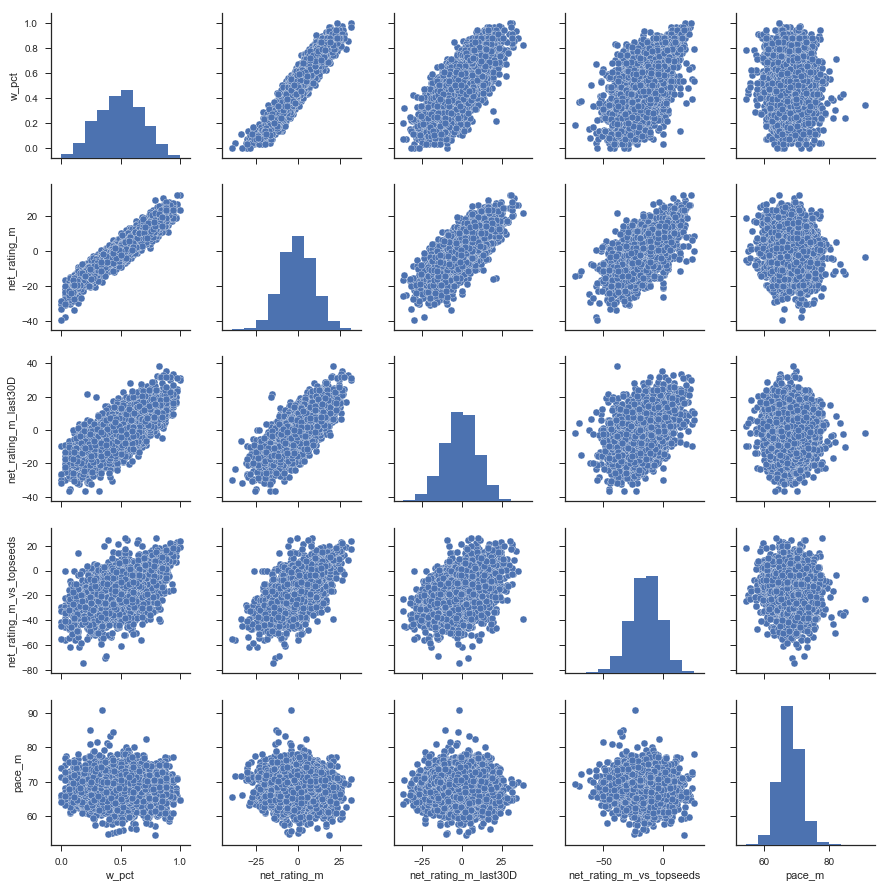

In [16]:
## > DATA VIZ RS
sns.set(style="ticks", color_codes=True)

df_teams_gr = df_agg_stats.loc[:,['w_pct',
                                  'net_rating_m', 'net_rating_m_last30D', 
                                  'net_rating_m_vs_topseeds', 'pace_m']]

df_teams_gr = df_teams_gr.fillna(0)

#df_teams_gr.describe()
sns.pairplot(df_teams_gr, palette="Set1")

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

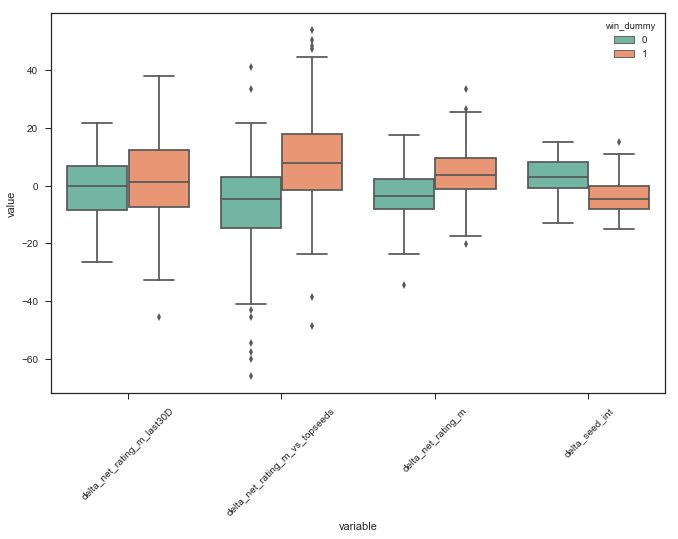

In [21]:
## > DATA VIZ TOURNEY
sns.set(style="ticks", color_codes=True)

df_tourn_cl_gr = df_tourn_cl[(df_tourn_cl['Season'].isin([2015, 2016, 2017, 2018]))].reindex()

df_tourn_cl_gr = df_tourn_cl_gr.loc[:,['win_dummy',
                                       'delta_net_rating_m_last30D',
                                       'delta_net_rating_m_vs_topseeds',
                                       'delta_net_rating_m',  
                                       'delta_seed_int']]

fig, ax = plt.subplots(figsize=(11, 7))
sns.boxplot(x="variable", y="value", hue = 'win_dummy', ax=ax, 
            data=pd.melt(df_tourn_cl_gr, id_vars='win_dummy'), palette="Set2")
plt.xticks(rotation=45)

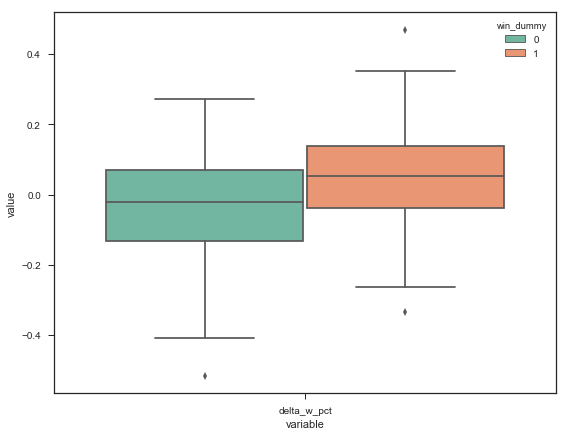

In [23]:
## > DATA VIZ TOURNEY
df_tourn_cl_gr = df_tourn_cl[(df_tourn_cl['Season'].isin([2015, 2016, 2017, 2018]))].reindex()

df_tourn_cl_gr = df_tourn_cl_gr.loc[:,['win_dummy',
                                       'delta_w_pct']]

fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x="variable", y="value", hue = 'win_dummy', ax=ax, 
            data=pd.melt(df_tourn_cl_gr, id_vars='win_dummy'), palette="Set2")

In [25]:
## > AR
def somers2_py(x, y):
    
    from sklearn.metrics import roc_auc_score
    
    C = roc_auc_score(y, x)
    Dxy = (2 * roc_auc_score(y, x))  - 1
    
    return Dxy, C

def apply_somers(df):
    
    d = {}
    
    dxy, cxy = somers2_py(df['value'],
                          df['win_dummy'])
    
    d['Dxy'] = dxy
    d['C'] = cxy
    
    
    return pd.Series(d)

df_tourn_cl_gr = df_tourn_cl[(df_tourn_cl['Season'].isin([2015, 2016, 2017, 2018]))].reindex()

df_tourn_cl_gr = df_tourn_cl_gr.loc[:,['win_dummy',
                                       'delta_net_rating_m_last30D',
                                       'delta_net_rating_m_vs_topseeds',                                       
                                       'delta_net_rating_m',  
                                       'delta_w_pct',
                                       'delta_seed_int']].fillna(0)

df_ar = pd.melt(df_tourn_cl_gr, id_vars='win_dummy')

df_ar.groupby(['variable']).\
                          apply(apply_somers).\
                          reset_index().\
                          sort_values(by=['Dxy'], ascending=False)

,variable,Dxy,C
2,delta_net_rating_m_vs_topseeds,0.516241,0.758121
0,delta_net_rating_m,0.457325,0.728663
4,delta_w_pct,0.343022,0.671511
1,delta_net_rating_m_last30D,0.109767,0.554884
3,delta_seed_int,-0.561324,0.219338


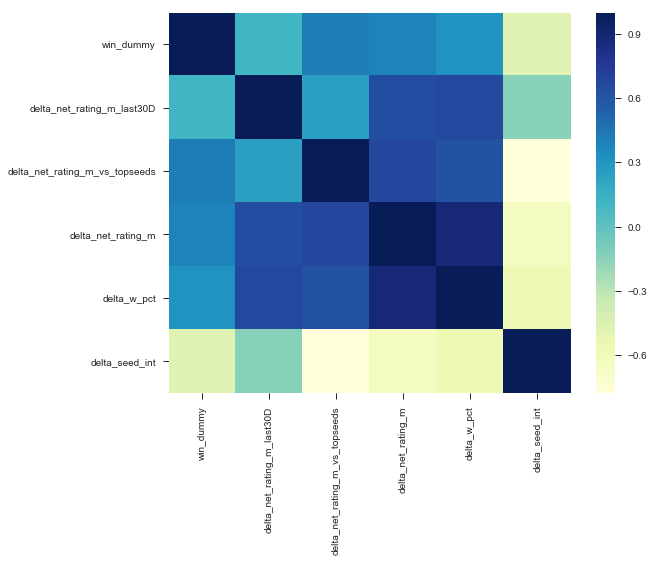

In [28]:
## > Correlation
# Compute the correlation matrix
df_tourn_cl_gr = df_tourn_cl[(df_tourn_cl['Season'].isin([2015, 2016, 2017, 2018]))].reindex()

df_tourn_cl_gr = df_tourn_cl_gr.loc[:,['win_dummy',
                                       'delta_net_rating_m_last30D',
                                       'delta_net_rating_m_vs_topseeds',                                       
                                       'delta_net_rating_m',  
                                       'delta_w_pct',
                                       'delta_seed_int']].fillna(0)

corr = df_tourn_cl_gr.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, cmap="YlGnBu", ax = ax)

## Conclusion
As all of you may have noticed the general and against top seeded stats seems to display a low correlation with the seeds. Which could be good for modelling. Unluckly instead, the last 30 days of the regular season seems to do not have high levels of accuracy; however, this information may become useful in order to predict the outcome of the first games of the tournament.

Hope you guys have enjoyed this first dive into the NCAA data.

I would like to hear from you if you have some comments and if someone would like to suggest some other advanced statistics which I missed and may have some predictive power and how they are related to Massey ordinals.